# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [7]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Godfather\Documents\Desktop folders\Data Science\Springboard\6.2 (1)-Project Human Body Temperature Using EDA\human_body_temperature.csv')


In [ ]:
# Your work here

#Checking the dataset

df.info()
df.head()

# Question 1: Is the distribution of body temperatures normal?

1. Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

2. Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test


A normal distribution is a bell-shaped frequency distribution curve. Most of the data values in a normal distribution tend to cluster around the mean.
Normal distributions are characterized as being symmetrical, unimodal/bell-shaped, with roughly 68% of the observations falling within 1 standard deviation of the mean AND roughly 95% falling within 1.96 standard deviations of the mean.

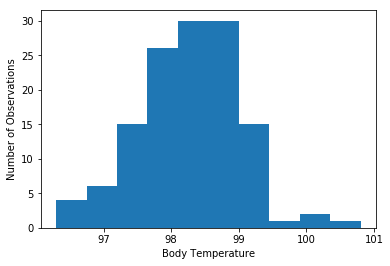

In [14]:
# Method 1:
# Plotting the sample data

import matplotlib.pyplot as plt

_ = plt.hist(df['temperature'])
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('Number of Observations')
plt.show()

Here the distribution of body temperatures appear to be roughly symmetrical and bell-shaped.

In [16]:
# Method 2:
# Checking Normality of the body temperature data
import numpy as np

mean_temp = np.mean(df['temperature'])
std_temp = np.std(df['temperature'])
samples_temp = np.random.normal(mean_temp, std_temp, size=10000)

In [19]:
print('We expect to find roughly 68% of the observations below a body temperature value of - ', 
      mean_temp + std_temp)
print('We expect to find roughly 95% of the observations below a body temperature value of - ', 
      mean_temp + (1.96*std_temp))

print('\n')

print('The sample mean is: ', mean_temp)
print('The sample standard deviation is: ', std_temp)

We expect to find roughly 68% of the observations below a body temperature value of -  98.97958854813581
We expect to find roughly 95% of the observations below a body temperature value of -  99.68073201588466


The sample mean is:  98.24923076923078
The sample standard deviation is:  0.7303577789050377


**Analysis of Question 1:**

The sample data is normally distributed as:

a) the distribution of the observations is roughly symmetrical and bimodal 

b) the sample set confirms to the characteristic that 68% of observations are within 1 standard deviation and that 95% of observations are within 1.96 standard deviations.

# Question 2: Is the sample size large? Are the observations independent?

1. Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply

The sample size of at least 30 units is considered as "large sample" (normality assumptions of means usually approximately holds due to the CLT).

Here, we will examine if the sample size is greater or lesser than 30. 

We will also determine if they are independent (check if each observation is unique)

In [23]:
df.info()
print('\nThe temperature column contains ', len(df['temperature']), 'observations.')
print('\n Checking if the observations are independent')
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB

The temperature column contains  130 observations.

 Checking if the observations are independent


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


**Analysis of Question 2:**

a) The dataset contains 130 observations and thus we can consider the sample size to be large

b) To consider the observations to be independent means that knowing the outcome of one sample would provide no information about another sample. Here, knowing one person's body temperature gives no information about any other person's body temperature.

# Question 3: Is the true population mean really 98.6 degrees F?

1. First, try a bootstrap hypothesis test.
2. Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
3. In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
4. Now try using the other test. How is the result be different? Why?


Ho (Null Hypothesis): True mean population temperature = 98.6 F 

Ho = 98.6

Ha (Alternative Hypothesis): True mean population temperature ≠ 98.6 F 

Ha ≠ 98.6

In [24]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


**3.1 Bootstrap Hypothesis Test - 100000 samples**

In [28]:
# bootstrap hypothesis test with 100000 samples
bs_test = np.empty(100000)

size = len(bs_test)

for i in range(size):
    bs_sample = np.random.choice(df.temperature, len(df.temperature))
    bs_test[i] = np.mean(bs_sample)
    
p = np.sum(bs_test >= 98.6) / size

print('p-value: {}'.format(p))
print('mean: {:0.5}'.format(np.mean(bs_test)))

p-value: 0.0
mean: 98.249


**Analysis of Question 3.1:**

a) With 100000 samples, the p-value is 0.0, stating that the null hypothesis should be rejected.

b) The mean body temperature of the sample is 98.249

**3.2 Frequentist Statistical Testing**

Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

**Analysis of Question 3.2**

Frequentist inference is a type of statistical inference that draws conclusions from sample data by emphasizing the frequency or proportion of the data. An alternative name is frequentist statistics.

When comparing the mean of a single sample to a population with a hypothesised mean, a one-sample t-test is appropriate.

**3.3 In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?**

**Analysis of Question 3.3**

Z - statistic = Z = (x – μ) / (σ / √n) where, μ is the population mean and σ is the population standard deviation. 

t - statistic = t = (x – μ) / (s / √n) where, μ is the hypothesised population mean and s is the sample standard deviation.

Z-statistic requires the population standard deviation, which is unknown. 
The t-statistic requires only the sample standard deviation, which can be derived. 
Without knowing the population standard deviation, the only choice is to use the t-statistic.

**3.4 Now try using the other test. How is the result be different? Why?**

A two-tailed test is required, since the alternative hypothesis is that there is a statistically-significant difference between the sample mean and the hypothetical population mean of 98.6, rather than testing whether the actual mean temperature is greater than or less than the hypothesised 98.6.

In [31]:
import scipy.stats as stats
import statsmodels.stats as smd

t_statistic = stats.ttest_1samp(df.temperature, 98.6)
print('t-score: {}\np-value: {}'.format(round(t_statistic.statistic, 5), round(t_statistic.pvalue, 5)))

t-score: -5.45482
p-value: 0.0


**Analysis of Question 3.4**

The t-Statistic is -5 with a p-value of 0.0

# Question 4: Draw a small sample of size 10 from the data and repeat both frequentist tests.

Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

In [32]:
# Getting a random sample of 10 observations
np.random.seed(7)
rand_samp = np.random.choice(df['temperature'], size=10)

test = stats.ttest_1samp(rand_samp, 98.6)
print('t-score: {:0.4}\np-value: {:0.4}'.format(test.statistic, test.pvalue))

t-score: -1.077
p-value: 0.3093


**Analysis of Question 4:**

Since the population standard deviation is unknown, the t-test is the only option available. 

The p-value is greater than 0.05, so the null hypothesis cannot be rejected on the basis of this test.

# Question 5: At what temperature should we consider someone's temperature to be "abnormal"?

As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.

Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [33]:
# Getting the sample mean and standard deviation to use with bootstrap and frequentist approaches later on

x_bar = np.mean(df.temperature)
s = np.std(df.temperature)
print('sample mean: {:0.4}\nsample standard deviation: {:0.4}\n'.format(x_bar, s))

sample mean: 98.25
sample standard deviation: 0.7304



**Bootstrap**

In [36]:
# bootstrap hypothesis test with 100000 samples
bs_replicates = np.empty(100000)

size = len(bs_replicates)

for i in range(size):
    bs_samp = np.random.choice(df.temperature, len(df.temperature))
    bs_replicates[i] = np.mean(bs_samp)
    
p_value = np.sum(bs_replicates >= 98.6) / size
print('p-value: {}'.format(p_value))

x_bar = np.mean(bs_replicates)
ci = stats.norm.interval(0.95, loc=x_bar, scale=s)

print('95% confidence interval: {:0.5} - {:0.5}'.format(ci[0], ci[1]))
print('margin of error: +/-{:0.5}\n\n'.format((ci[1] - x_bar)))

p-value: 0.0
95% confidence interval: 96.818 - 99.68
margin of error: +/-1.4315




**Frequentist Approach**

In [42]:
# Frequentist Approach - Confidence Interval for the one-sample t-test

# Considering alpha = 0.05, confidence coefficient = 95%

# confidence interval for one draw
ci_low, ci_high = stats.norm.interval(0.95, loc=x_bar, scale=s)
print('95% confidence interval: {:0.5} - {:0.5}'.format(ci_low, ci_high))

# margin of error 
print('margin of error: +/-{:0.5}'.format((ci_high - x_bar))) 

95% confidence interval: 96.818 - 99.68
margin of error: +/-1.4315


**Analysis of Question 5:**

According to both the Bootstrap and Frequentist approaches, using the mean we calculated (98.25), and at a 95% confidence interval, a temperature below 96.818 or above 99.681 would be considered abnormal.

# Question 6: Is there a significant difference between males and females in normal temperature?

What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

__Hypotheses:__

Ho : Xm = Xf

Ha : Xm ≠ Xf

In [49]:
male_df = df[df['gender'] == 'M']
female_df = df[df['gender'] == 'F']

print('There are {} males in the sample and their mean temperature is {} '.format(len(male_df), 
                                                                                     male_df['temperature'].mean()))
print('There are {} females in the sample and their mean temperature is {}'.format(len(female_df), 
                                                                                       female_df['temperature'].mean()))

There are 65 males in the sample and their mean temperature is 98.1046153846154 
There are 65 females in the sample and their mean temperature is 98.39384615384613


In [51]:
# Comparing the male sample mean to the female sample mean
import scipy.stats as st
two_tailed = st.ttest_ind(male_df['temperature'], female_df['temperature'])
print('The t-statistic is %.4f and the p-value is %.4f.' % two_tailed)

The t-statistic is -2.2854 and the p-value is 0.0239.


**Analysis of Question 6:**

The sample consists of 130 samples; 65 males and 65 females.

The distributions for both samples approximate the standard normal distribution and both sample sizes are sufficiently large, so the Central Limit Theorem applies and inferences can be made based on the properties of the normal distribution.

Ho : Xm = Xf

Ha : Xm ≠ Xf

Because the null hypothesis is that the means are equal, a two-tailed test is required.

This is a statistical significance, but not a practical significance because of the nature of human temperatures.